In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('weatherAUS.csv')

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
#There are too many missing values in Evaporation, Sunshine Cloud9am, Cloud3pm, so we will drop these columns
#and impute the other columns for missing values
#Also, there are some missing values for our target variable RainTomorrow and also for RainToday, we will drop the missing rows 
#of these two columns as well
df.isnull().sum(axis = 0)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

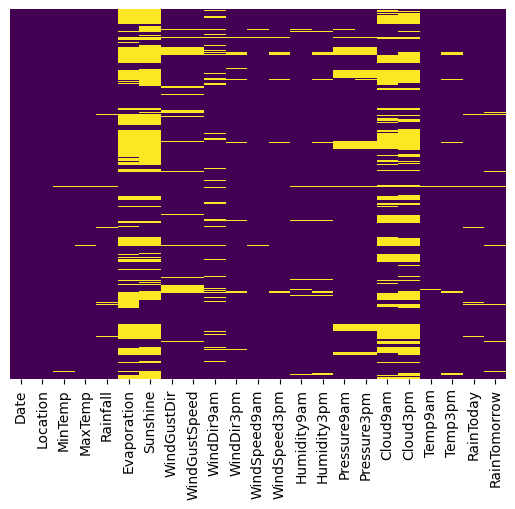

In [14]:
#This is a heatmap of the missing values. 
#Every yellow dash represents a missing value.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#plt.savefig('heatmap_missing_values.png', dpi=300, bbox_inches='tight')

In [15]:
#drop columns Evaporation, Sunshine, Cloud9am, Cloud3pm and also 'Date' and 'Location'
#and also null rows in columns RainToday and RainTomorrow
#df.drop(['Evaporation','Sunshine', 'Cloud9am', 'Cloud3pm', 'Date', 'Location'], axis =1, inplace=True)
#df.dropna(subset=['RainToday', 'RainTomorrow'], inplace = True)


In [16]:
#There are too many missing values in Evaporation, Sunshine Cloud9am, Cloud3pm, so we will drop these columns
#and impute the other columns for missing values
df.isnull().sum(axis = 0)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

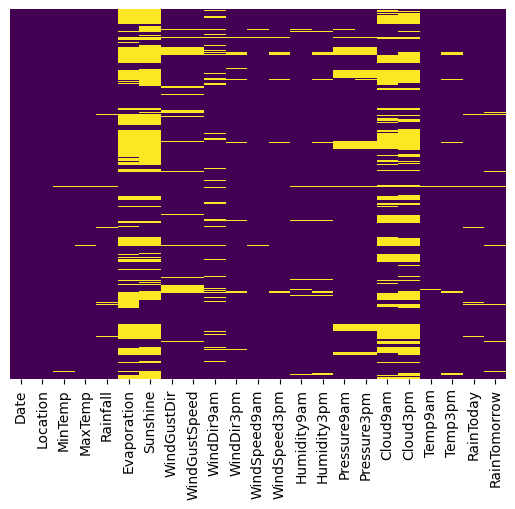

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [19]:
#Now we will start imputing all our columns, first we will check the column
#types, whether they are categorical or numerical features
df.isnull().sum(axis = 0)


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
#Now we will start imputing all our columns, first we will check the column
#types, whether they are categorical or numerical features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [21]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
categorical_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
#This is the easiest way to impute the missing numeric values.
#It imputes this missing values using the mean of the column values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')  

In [24]:
imputer.fit(df[numeric_cols]) 

SimpleImputer()

In [25]:
df[numeric_cols]= imputer.transform(df[numeric_cols])

In [26]:
imputercat = SimpleImputer(strategy = 'most_frequent')

In [27]:
imputercat.fit(df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [28]:
df[categorical_cols] = imputercat.transform(df[categorical_cols])

In [29]:
df.isnull().sum(axis = 0)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

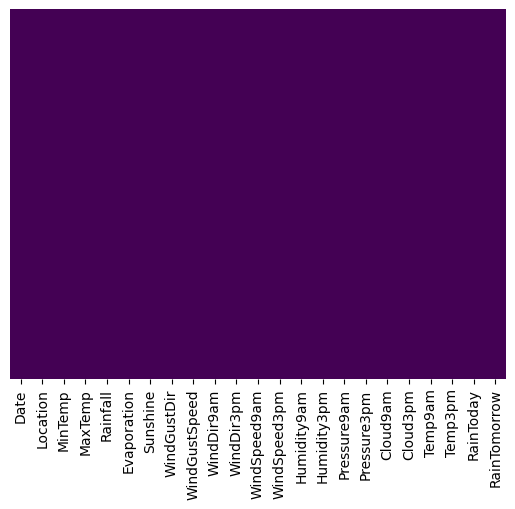

In [30]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
#Data Cleaned till this stage
#Now we need to encode categorical values for the model

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [33]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [34]:
#now all categorical values are encoded to numerical values, which our model can understand.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,890,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,989,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,1088,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,1115,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,1124,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [35]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,1732.624955,23.793524,12.194034,23.221348,2.360918,5.468232,7.611178,8.09360,40.035230,6.999526,...,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390,0.219167,0.219146
std,993.712770,14.228687,6.365750,7.088124,8.382488,3.161541,2.729486,4.69411,13.118253,4.515839,...,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057,0.413683,0.413669
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,875.000000,11.000000,7.700000,18.000000,0.000000,4.000000,7.611178,4.00000,31.000000,3.000000,...,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,1746.000000,24.000000,12.100000,22.700000,0.000000,5.468232,7.611178,9.00000,39.000000,7.000000,...,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000,0.000000,0.000000
75%,2593.000000,36.000000,16.800000,28.200000,1.000000,5.468232,8.700000,13.00000,46.000000,11.000000,...,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,...,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


<Axes: >

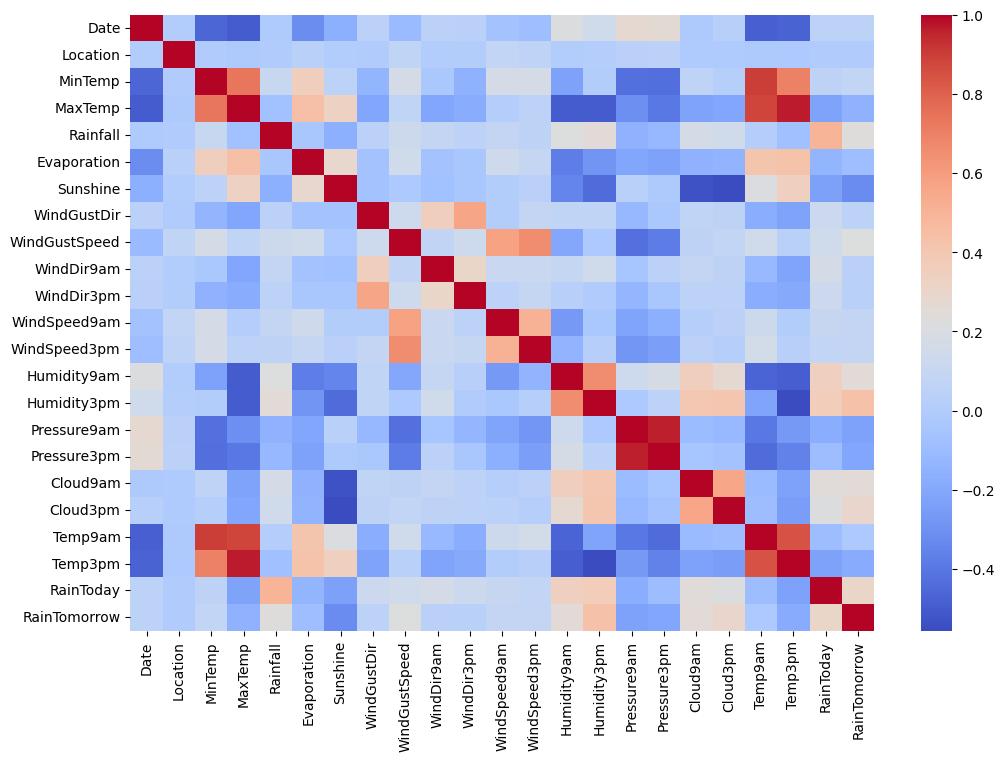

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Plot')
#plt.savefig('correlation_plot.png')

In [37]:
z_scores = (df - df.mean()) / df.std()

In [38]:
z_scores.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-0.847956,-1.531661,0.189446,-0.045336,-0.210071,-2.809321e-16,-6.508028e-16,1.045225,0.302233,1.328762,...,0.112394,-1.442960,-1.478783,-1.223878,1.568031e+00,-8.487318e-16,-0.014053,0.017023,-0.529794,-0.529762
1,-0.748330,-1.531661,-0.753098,0.265042,-0.281649,-2.809321e-16,-6.508028e-16,1.258258,0.302233,-0.221338,...,-1.319604,-1.296413,-1.047778,-1.118835,-3.920271e-16,-8.487318e-16,0.032464,0.381984,-0.529794,-0.529762
2,-0.648704,-1.531661,0.110901,0.349691,-0.281649,-2.809321e-16,-6.508028e-16,1.471291,0.454692,1.328762,...,-1.637826,-1.052167,-1.493645,-0.983781,-3.920271e-16,-1.199228e+00,0.621683,0.221401,-0.529794,-0.529762
3,-0.621533,-1.531661,-0.470335,0.674177,-0.281649,-2.809321e-16,-6.508028e-16,-0.872072,-1.222360,0.442991,...,-1.266567,-1.736055,-0.007422,-0.368532,-3.920271e-16,-8.487318e-16,0.172016,0.703149,-0.529794,-0.529762
4,-0.612476,-1.531661,0.833518,1.280826,-0.162353,-2.809321e-16,-6.508028e-16,1.045225,0.073544,-1.328552,...,0.695801,-0.905620,-1.018054,-1.388945,1.126648e+00,1.667533e+00,0.125499,1.170298,-0.529794,-0.529762


In [39]:
z_scores.to_csv('zscores.csv', index = 'false')

In [40]:
outlier_indices = z_scores[(z_scores > 3) | (z_scores < -3)].dropna(how='all').index

In [41]:
outlier_indices

Index([     8,     12,     52,     62,     68,    123,    267,    296,    356,
          381,
       ...
       145095, 145189, 145238, 145239, 145250, 145251, 145252, 145278, 145279,
       145393],
      dtype='int64', length=8852)

In [42]:
filtered_df = df.drop(outlier_indices)

In [43]:
filtered_df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,...,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.000000,136608.00000,136608.000000,136608.000000,136608.000000
mean,1744.706899,23.759172,12.050149,23.164435,1.484845,5.237555,7.641319,8.060721,38.920919,6.980016,...,69.162545,51.432823,1018.018203,1015.593533,4.424749,4.484131,16.87507,21.643245,0.202455,0.205925
std,988.654224,14.190744,6.294821,6.856800,3.800822,2.350301,2.693015,4.699803,11.704644,4.519337,...,18.177201,19.867619,6.399562,6.368059,2.254229,2.083986,6.31770,6.623193,0.401831,0.404377
min,0.000000,0.000000,-6.900000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,13.000000,1.000000,997.500000,995.300000,0.000000,0.000000,-2.30000,1.200000,0.000000,0.000000
25%,894.000000,11.000000,7.500000,18.000000,0.000000,4.000000,7.611178,4.000000,31.000000,3.000000,...,58.000000,37.000000,1014.000000,1011.500000,3.000000,4.000000,12.30000,16.800000,0.000000,0.000000
50%,1768.000000,24.000000,11.900000,22.700000,0.000000,5.468232,7.611178,9.000000,39.000000,7.000000,...,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.70000,21.300000,0.000000,0.000000
75%,2597.000000,36.000000,16.600000,28.000000,0.800000,5.468232,8.700000,13.000000,46.000000,11.000000,...,82.000000,65.000000,1022.000000,1019.600000,6.000000,6.000000,21.30000,26.100000,0.000000,0.000000
max,3435.000000,48.000000,31.000000,44.400000,27.400000,14.900000,14.500000,15.000000,78.000000,15.000000,...,100.000000,100.000000,1037.800000,1035.200000,9.000000,9.000000,36.30000,42.200000,1.000000,1.000000


In [44]:
#filtered_df.to_csv('final_cleaned_data.csv', index=False)

In [45]:
#Just to make sure that all our values are either int or float.
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136608 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           136608 non-null  int32  
 1   Location       136608 non-null  int32  
 2   MinTemp        136608 non-null  float64
 3   MaxTemp        136608 non-null  float64
 4   Rainfall       136608 non-null  float64
 5   Evaporation    136608 non-null  float64
 6   Sunshine       136608 non-null  float64
 7   WindGustDir    136608 non-null  int32  
 8   WindGustSpeed  136608 non-null  float64
 9   WindDir9am     136608 non-null  int32  
 10  WindDir3pm     136608 non-null  int32  
 11  WindSpeed9am   136608 non-null  float64
 12  WindSpeed3pm   136608 non-null  float64
 13  Humidity9am    136608 non-null  float64
 14  Humidity3pm    136608 non-null  float64
 15  Pressure9am    136608 non-null  float64
 16  Pressure3pm    136608 non-null  float64
 17  Cloud9am       136608 non-null  fl

In [46]:
filtered_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,890,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,989,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,1088,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,1115,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,1124,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = filtered_df.drop('RainTomorrow', axis=1)

In [49]:
y = filtered_df['RainTomorrow']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators = 30)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(confusion_matrix(y_test, rfc_pred))

[[31259  1243]
 [ 4673  3808]]


In [58]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     32502
           1       0.75      0.45      0.56      8481

    accuracy                           0.86     40983
   macro avg       0.81      0.71      0.74     40983
weighted avg       0.85      0.86      0.84     40983



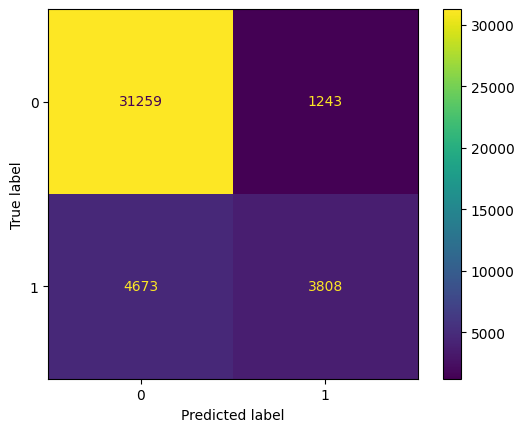

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred)
#plt.savefig('CF for Random Forests.png')

<Axes: >

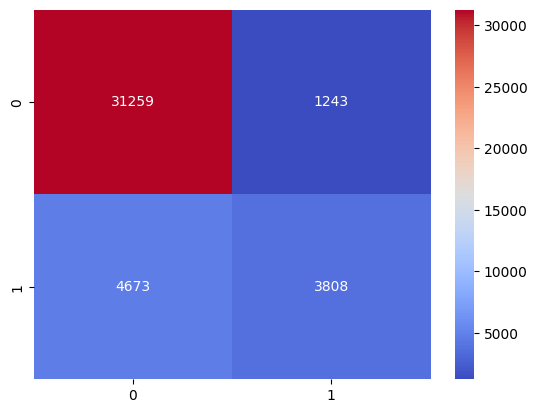

In [60]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), cmap="coolwarm", annot=True, fmt='g')
#plt.savefig('Random Forest CF Matrix Final.png')